In [1]:
import os
import importlib

import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import skimage

import load_data
#import first_exp_model_with_pytorch as dloader
import first_exp_model_with_pytorch

In [2]:
plt.style.use('Solarize_Light2')
%matplotlib inline
importlib.reload(first_exp_model_with_pytorch)

<module 'first_exp_model_with_pytorch' from '/home/uldo/work/kaggle/competitions/Human_Protein_Atlas_Image_Classification/code/first_exp_model_with_pytorch.py'>

In [3]:
LABEL_NAMES_MAP = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

In [4]:
train_df = load_data.load_text_data('../input/train.csv')

In [11]:
#train_dataset = dloader.HumanProteinAtlasDataset(train_df, transform=dloader.transforms.ToTensor)
train_dataset = first_exp_model_with_pytorch.HumanProteinAtlasDataset(
    train_df,
    transform=first_exp_model_with_pytorch.transforms.ToTensor()
)

In [12]:
#train_loader = dloader.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
train_loader = first_exp_model_with_pytorch.data.DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=1)

In [7]:
print(train_loader)

In [13]:
train_iter = iter(train_loader)

_load_multicolor_image, img_components_id:  0c5dc01e-bbc1-11e8-b2bb-ac1f6b6435d0
_load_multicolor_image, img_components_id:  c69d51e4-bbc4-11e8-b2bc-ac1f6b6435d0
_load_multicolor_image, img_components_id:  a6d6d82e-bba8-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_components_id:  23e06470-bbb8-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_components_id:  0f1decfe-bbc4-11e8-b2bc-ac1f6b6435d0
_load_multicolor_image, img_components_id:  0fd44588-bbb2-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_components_id:  4a93eabc-bbc5-11e8-b2bc-ac1f6b6435d0
_load_multicolor_image, img_components_id:  62c2e58a-bba1-11e8-b2b9-ac1f6b6435d0
_load_multicolor_image, img_components_id:  a6d2d616-bbbc-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_components_id:  554e9fd2-bbbc-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_components_id:  6404e3ca-bbb1-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_components_id:  934acb9a-bbb6-11e8-b2ba-ac1f6b6435d0
_load_multicolor_image, img_

In [14]:
print(type(train_iter))

<class 'torch.utils.data.dataloader._DataLoaderIter'>


In [15]:
images, labels = train_iter.next()

In [17]:
print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

images shape on batch size = torch.Size([10, 4, 512, 512])
labels shape on batch size = torch.Size([10, 1, 28])


In [18]:
import torchvision

In [22]:
grid = torchvision.utils.make_grid(images)
#grid = torchvision.utils.make_grid([image[0] for image in images])

RuntimeError: The expanded size of the tensor (3) must match the existing size (4) at non-singleton dimension 0

TypeError: Invalid dimensions for image data

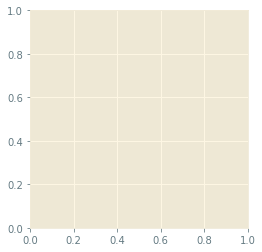

In [21]:
plt.imshow(grid)
plt.axis('off')
plt.title(labels.numpy())